In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.options.display.max_columns = 999

from plotly.offline import plot, iplot
from plotly import graph_objs as go
#init_notebook_mode(connected = True)
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df_price = pd.read_csv('../data/player_price.csv')
df_stats = pd.read_csv('../data/player_stats.csv')

In [5]:
df_price['Date'] = pd.to_datetime(df_price['timestamp'], unit='ms')
df_price.drop(['timestamp'], axis=1, inplace=True)
df_price['Year']= df_price['Date'].dt.year
df_price['Month'] = df_price['Date'].dt.month
df_price['year_month'] = df_price['Year'].astype(str) + "_" +\
                            df_price['Month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)

In [6]:
df_merge=pd.merge(df_price,df_stats,on='player_id', how='inner')

In [7]:
df_merge=df_merge.loc[(df_merge['xbox_price']>100000) & (df_merge['ps_price']!=0)]
df_merge

,ps_price,xbox_price,player_id,player_name,Date,Year,Month,year_month,acceleration,aggression,agility,balance,ball,composure,crossing,curve,defending,diving,dribbling,finishing,fk,handling,heading,interceptions,jumping,kicking,long,marking,pace,passing,penalties,physicality,positioning,raits,reactions,reflexes,shooting,short,shot,sliding,specialities,speed,sprint,stamina,standing,strength,vision,volleys,cam,cb,cdm,cf,cm,lb,lf,lm,lw,lwb,rb,rf,rm,rw,rwb,st,added_on,age,att_workrate,club,def_workrate,foot,height,intl_reputation,league,name,nation,origin,revision,skills,weak_foot,weight,colour,front_scores,overall_score,position,rareness
20749,4080957,3699148,18947,Cristiano Ronaldo,2017-06-09,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",0,98,99,45,92,95,94,96,63,71,98,89,70,98,96,97,74,70,98,96,97,74,98,2017-06-08,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,TOTS-LaLiga,TOTS,5,4,80,gold,"{'PHY': '92', 'DEF': '48', 'DRI': '99', 'PAS':...",99,LW,rare
20750,3251661,3073447,18947,Cristiano Ronaldo,2017-06-10,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",0,98,99,45,92,95,94,96,63,71,98,89,70,98,96,97,74,70,98,96,97,74,98,2017-06-08,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,TOTS-LaLiga,TOTS,5,4,80,gold,"{'PHY': '92', 'DEF': '48', 'DRI': '99', 'PAS':...",99,LW,rare
20751,3141748,3086910,18947,Cristiano Ronaldo,2017-06-11,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",0,98,99,45,92,95,94,96,63,71,98,89,70,98,96,97,74,70,98,96,97,74,98,2017-06-08,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,TOTS-LaLiga,TOTS,5,4,80,gold,"{'PHY': '92', 'DEF': '48', 'DRI': '99', 'PAS':...",99,LW,rare
20752,3020879,3110350,18947,Cristiano Ronaldo,2017-06-12,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",0,98,99,45,92,95,94,96,63,71,98,89,70,98,96,97,74,70,98,96,97,74,98,2017-06-08,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,TOTS-LaLiga,TOTS,5,4,80,gold,"{'PHY': '92', 'DEF': '48', 'DRI': '99', 'PAS':...",99,LW,rare
20753,3081459,2923158,18947,Cristiano Ronaldo,2017-06-13,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",0,98,99,45,92,95,94,96,63,71,98,89,70,98,96,97,74,70,98,96,97,74,98,2017-06-08,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,TOTS-LaLiga,TOTS,5,4,80,gold,"{'PHY': '92', 'DEF': '48', 'DRI': '99', 'PAS':...",99,LW,rare
20754,2995687,2900399,18947,Cristiano Ronaldo,2017-06-14,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",0,98,99,45,92,95,94,96,63,71,98,89,70,98,96,97,74,70,98,96,97,74,98,2017-06-08,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,TOTS-LaLiga,TOTS,5,4,80,gold,"{'PHY': '92', 'DEF': '48', 'DRI': '99', 'PAS':...",99,LW,rare
20755,2933250,2964771,18947,Cristiano Ronaldo,2017-06-15,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di..

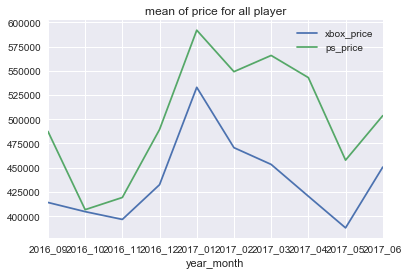

In [39]:
df_merge.groupby(df_merge.year_month)['xbox_price','ps_price'].mean().plot()
plt.title('mean of price for all player')

ball
99    7263229
93    6283688
95    5904118
Name: ps_price, dtype: int64
ball
99    7263229
93    6283688
95    5904118
Name: ps_price, dtype: int64


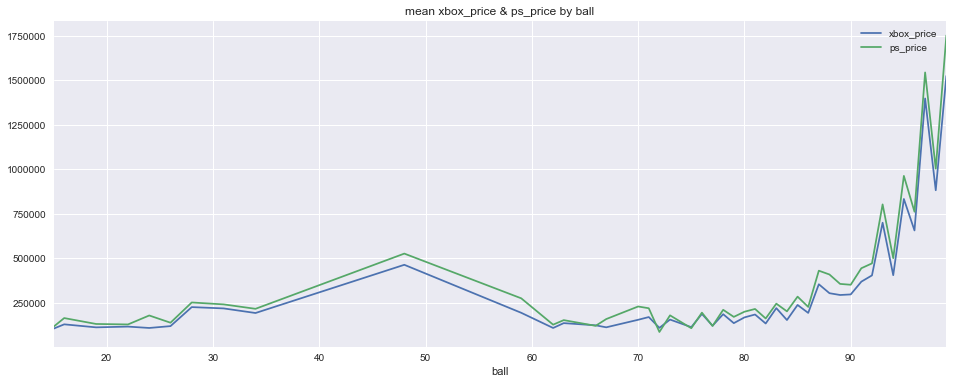

In [31]:
print(df_merge.groupby('ball')['ps_price'].max().sort_values(ascending=False)[:3])
print(df_merge.groupby('ball')['ps_price'].max().sort_values(ascending=False)[:3])

plt.figure(figsize=(16,6))
df_merge.groupby('ball')['xbox_price'].mean().plot()
df_merge.groupby('ball')['ps_price'].mean().plot()
plt.legend()
plt.title('mean xbox_price & ps_price by ball')

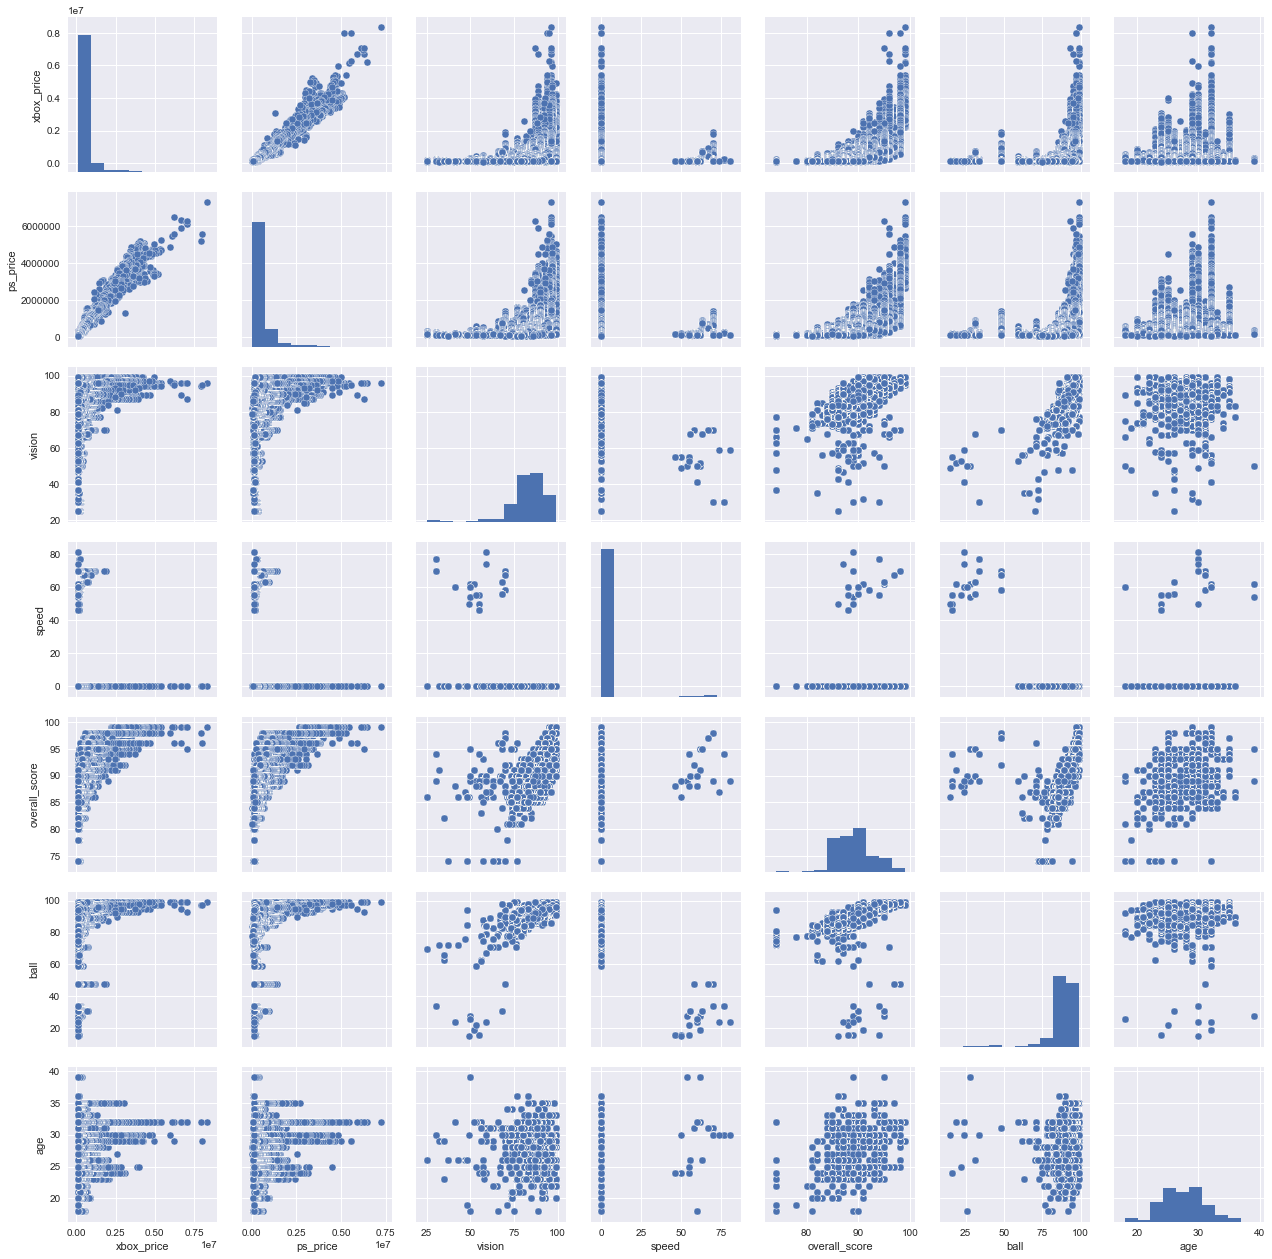

In [34]:
sns_ = ['xbox_price','ps_price','vision','speed','overall_score','ball','age']
sns.pairplot(df_merge[sns_])

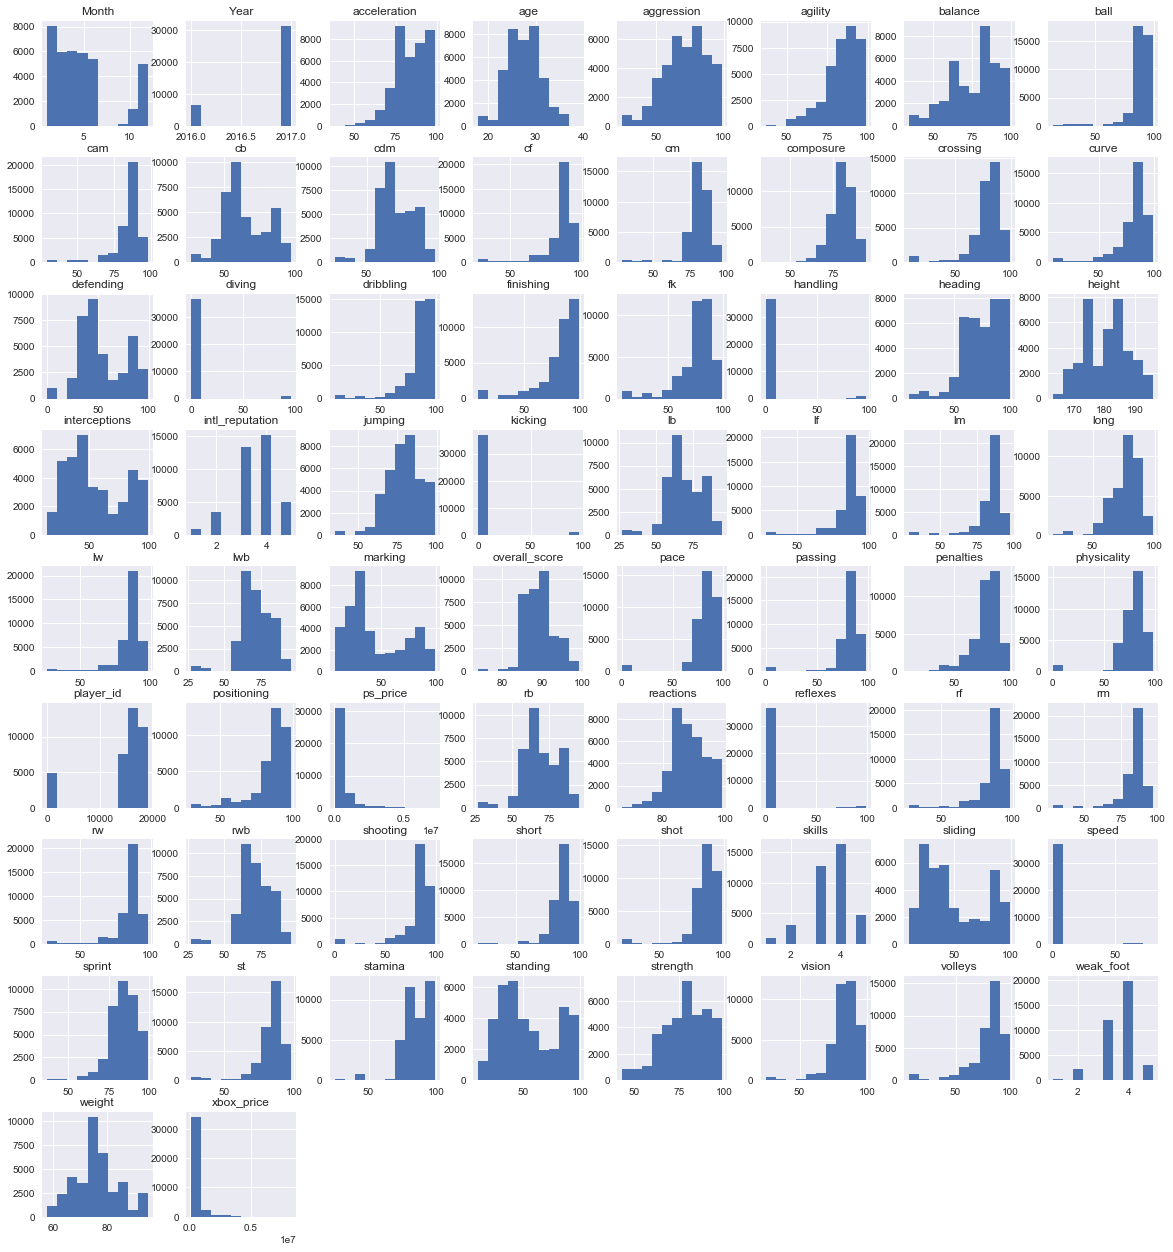

In [34]:
features = list(set(df_merge.columns) - set(['player_name','raits','specialities','att_workrate',
                                             'club','def_workrate','foot','league','name','nation',
                                            'origin','revision','colour','front_scores','position','rareness']))

df_merge[features].hist(figsize=(20,22));

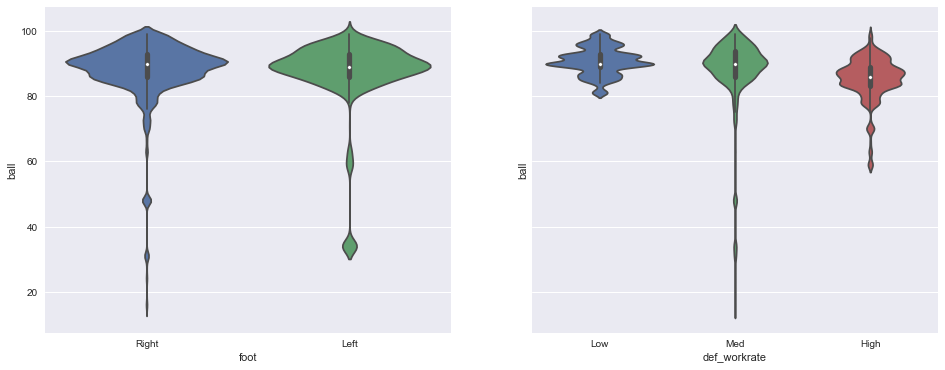

In [16]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(16,6))

sns.violinplot(x='foot', y='ball', data=df_merge, ax=axes[0])
sns.violinplot(x='def_workrate', y='ball', data=df_merge, ax=axes[1])

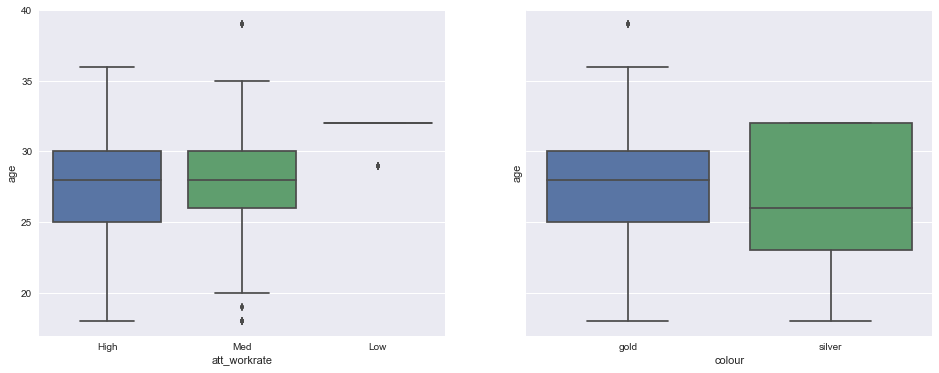

In [33]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(16,6))

sns.boxplot(x='att_workrate', y='age', data=df_merge, ax=axes[0])
sns.boxplot(x='colour', y='age', data=df_merge, ax=axes[1])